# COVID-19 plots
The purpose of this notebook is to plot the progression of COVID-19 cases based upon the New York Times' daily updated database. See https://github.com/nytimes/covid-19-data for more details on that database. Note data are stored by state and by county. Plots are linear-log, in order to capture the exponential growth of COVID-19, and perhaps more easily visualize when this growth is no longer exponential. 

Kirk Knobelspiesse, knobelspiesse@gmail.com

## Setup

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

# Print floating point numbers using fixed point notation
np.set_printoptions(suppress=True)

import seaborn as sns
sns.set(style='ticks', context='talk')
import matplotlib.pyplot as plt
from datetime import datetime

import pickle
import json

# Only 10 rows of data will be displayed
# pd.set_option("max_rows", 10) 
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

## Get data

In [2]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/"
filename_states = "us-states.csv"
filename_counties="us-counties.csv"
stt = pd.read_csv(url+filename_states, skiprows=2, names=["date","state","fips","cases","deaths"])
cyt = pd.read_csv(url+filename_counties, skiprows=2, names=["date","county","state","fips","cases","deaths"])


In [3]:
cyt.tail()

,date,county,state,fips,cases,deaths
164880,2020-05-21,Sublette,Wyoming,56035.0,3,0
164881,2020-05-21,Sweetwater,Wyoming,56037.0,25,0
164882,2020-05-21,Teton,Wyoming,56039.0,100,1
164883,2020-05-21,Uinta,Wyoming,56041.0,13,0
164884,2020-05-21,Washakie,Wyoming,56043.0,19,1


/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

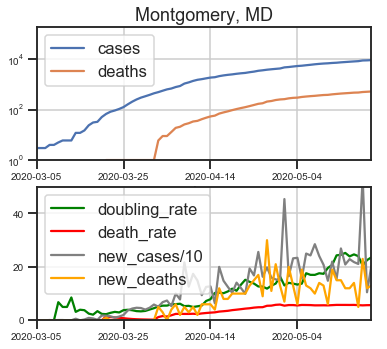

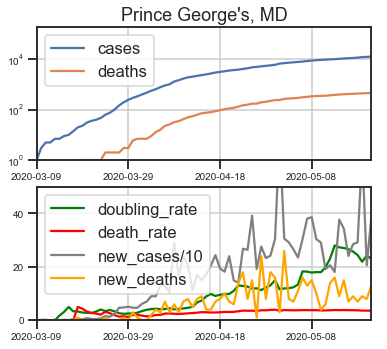

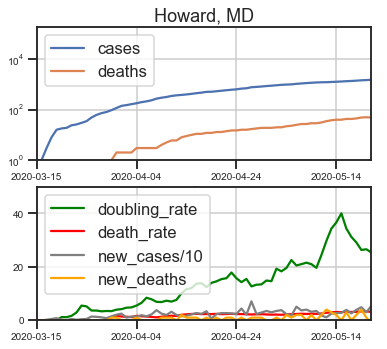

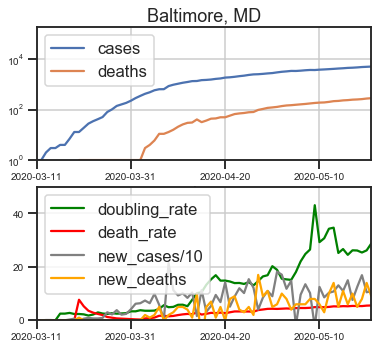

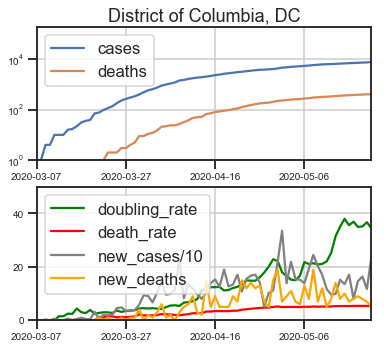

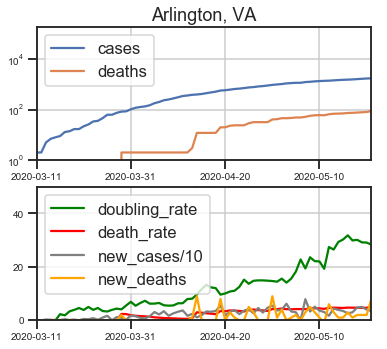

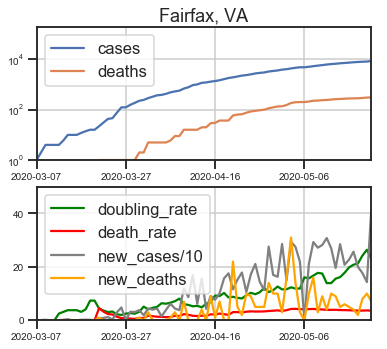

/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


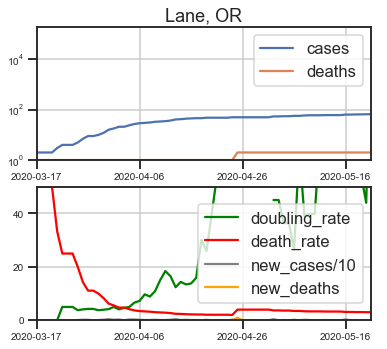

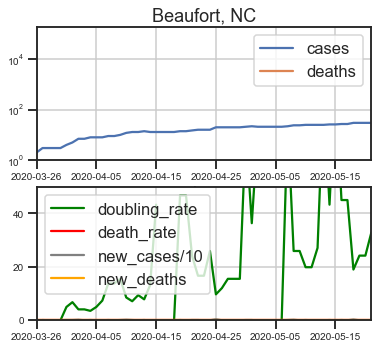

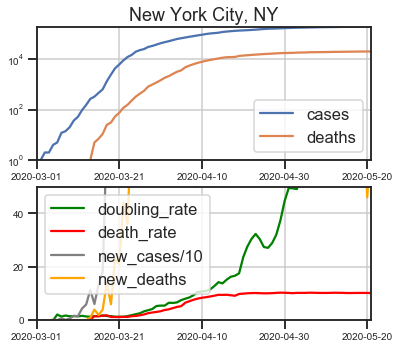

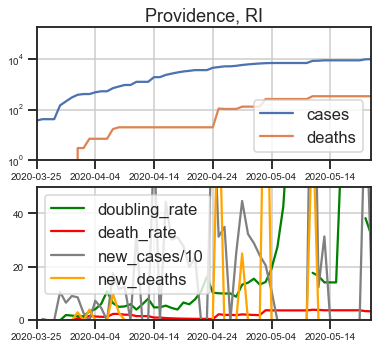

In [4]:
this_county=["Montgomery","Prince George's","Howard","Baltimore","District of Columbia","Arlington","Fairfax",\
            "Lane","Beaufort","New York City","Providence"]
this_state=["Maryland","Maryland","Maryland","Maryland","District of Columbia","Virginia","Virginia",\
            "Oregon", "North Carolina","New York","Rhode Island"]
this_state_short=["MD","MD","MD","MD","DC","VA","VA","OR","NC","NY","RI"]



yr=[1,200000]
fs=10
days_passed=5

for i in range(0,len(this_state)):
    this=cyt[(cyt.state==this_state[i]) & (cyt.county==this_county[i])]
    tt=this.cases.to_numpy(copy=True)
    r_tt=np.roll(tt,days_passed)
    doubling_rate= (days_passed*np.log(2.))/(np.log(tt/r_tt))
    doubling_rate[np.argwhere(doubling_rate<0)]=0
    this['doubling_rate']=doubling_rate
    
    dr=100*this.deaths.to_numpy(copy=True) / this.cases.to_numpy(copy=True)
    this['death_rate']=dr
    
    cases=this.cases.to_numpy(copy=True)
    r_cases=np.roll(cases,1)
    this['new_cases/10']=(cases-r_cases)/10

    deaths=this.deaths.to_numpy(copy=True)
    r_deaths=np.roll(deaths,1)
    this['new_deaths']=deaths-r_deaths
        
    fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(6,6))
    this_name=this_county[i]+", "+this_state_short[i]
    this.plot('date',['cases','deaths'],kind = 'line',title=this_name,
              fontsize=fs,logy=True,ylim=yr,ax=axes[0],grid=True)
    this.plot('date',['doubling_rate','death_rate','new_cases/10','new_deaths'],kind = 'line',
        color=['green','red','grey','orange'],fontsize=fs,logy=False,ylim=[0,50],ax=axes[1],grid=True)
    this_savename="CV19_county_"+this_county[i].replace(" ", "")+".pdf"
    
    if (i == 0) : mont=this
    
    plt.subplots_adjust(bottom=0.2)
    plt.xlabel("")
    plt.savefig(this_savename)
    plt.show()
    plt.close()
    
    

/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

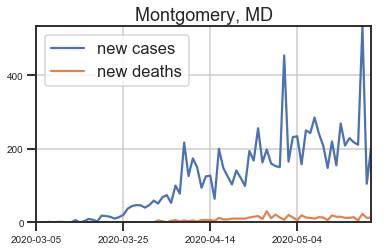

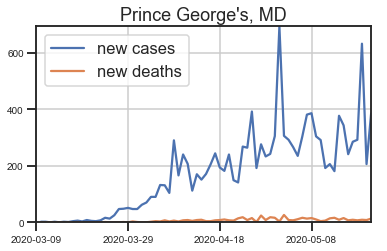

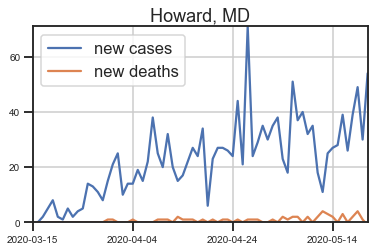

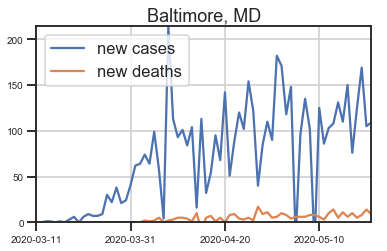

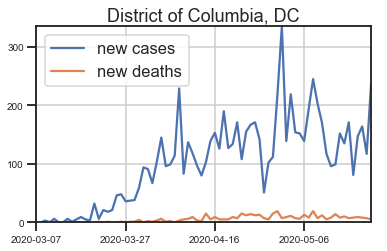

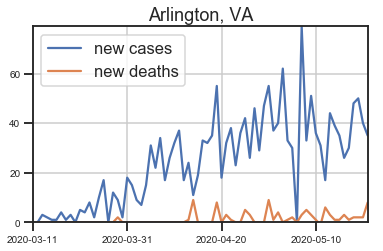

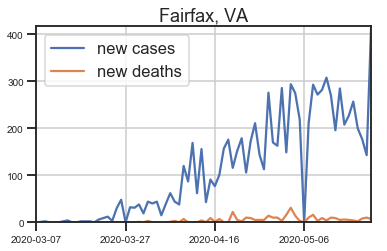

/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


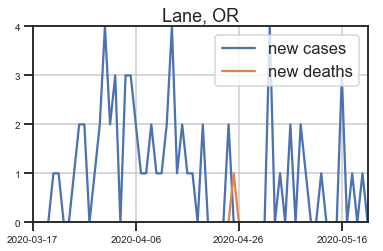

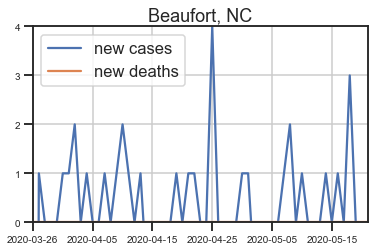

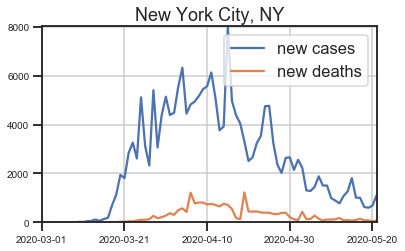

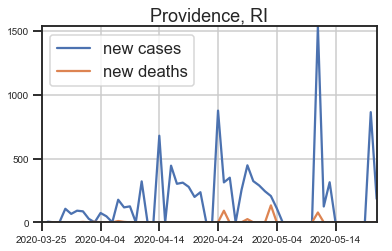

In [5]:
this_county=["Montgomery","Prince George's","Howard","Baltimore","District of Columbia","Arlington","Fairfax",\
            "Lane","Beaufort","New York City","Providence"]
this_state=["Maryland","Maryland","Maryland","Maryland","District of Columbia","Virginia","Virginia",\
            "Oregon", "North Carolina","New York","Rhode Island"]
this_state_short=["MD","MD","MD","MD","DC","VA","VA","OR","NC","NY","RI"]



yr=[1,200000]
fs=10
days_passed=5

for i in range(0,len(this_state)):
    this=cyt[(cyt.state==this_state[i]) & (cyt.county==this_county[i])]
    tt=this.cases.to_numpy(copy=True)
    r_tt=np.roll(tt,days_passed)
    doubling_rate= (days_passed*np.log(2.))/(np.log(tt/r_tt))
    doubling_rate[np.argwhere(doubling_rate<0)]=0
    this['doubling_rate']=doubling_rate
    
    cases=this.cases.to_numpy(copy=True)
    r_cases=np.roll(cases,1)
    this['new cases']=cases-r_cases

    deaths=this.deaths.to_numpy(copy=True)
    r_deaths=np.roll(deaths,1)
    this['new deaths']=deaths-r_deaths
             
    yt=np.nanmax([this['new cases'], this['new deaths']] )
    if (yt <= 0) : yt=50
    if (not(np.isfinite(yt))) : yt=50    
        
    this_name=this_county[i]+", "+this_state_short[i]
    #this.plot('date',['cases','deaths'],kind = 'line',title=this_name,
    #          fontsize=fs,logy=True,ylim=yr,ax=axes[0],grid=True)
    this.plot('date',['new cases','new deaths'],kind = 'line',
        fontsize=fs,logy=False,ylim=[0,yt],grid=True, title=this_name)
    this_savename="CV19_county_simple"+this_county[i].replace(" ", "")+".pdf"
    
    if (i == 0) : mont=this
    
    plt.subplots_adjust(bottom=0.2)
    plt.xlabel("")
    plt.savefig(this_savename)
    plt.show()
    plt.close()
    
    

In [6]:
mont

,date,county,state,fips,cases,deaths,doubling_rate,new cases,new deaths
554,2020-03-05,Montgomery,Maryland,24031.0,3,0,0.000000,-9294,-528
614,2020-03-06,Montgomery,Maryland,24031.0,3,0,0.000000,0,0
699,2020-03-07,Montgomery,Maryland,24031.0,3,0,0.000000,0,0
801,2020-03-08,Montgomery,Maryland,24031.0,4,0,0.000000,1,0
924,2020-03-09,Montgomery,Maryland,24031.0,4,0,0.000000,0,0
1070,2020-03-10,Montgomery,Maryland,24031.0,5,0,6.784577,1,0
1250,2020-03-11,Montgomery,Maryland,24031.0,6,0,5.000000,1,0
1468,2020-03-12,Montgomery,Maryland,24031.0,6,0,5.000000,0,0
1747,2020-03-13,Montgomery,Maryland,24031.0,6,0,8.547556,0,0
2088,2020-03-14,Montgomery,Maryland,24031.0,12,0,3.154649,6,0


/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

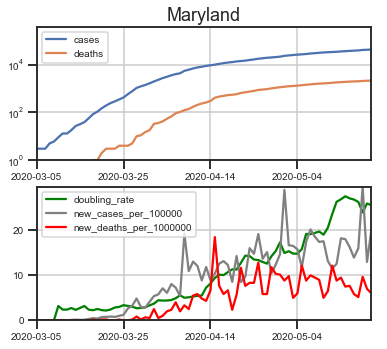

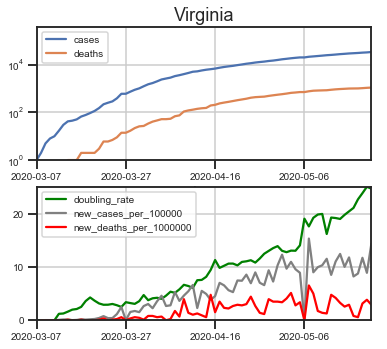

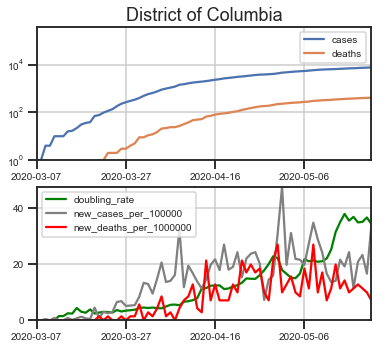

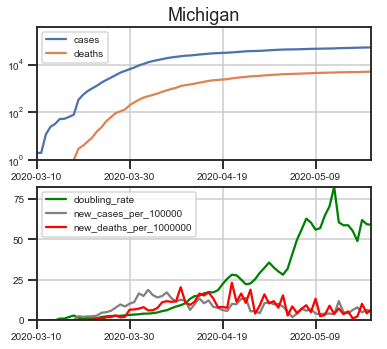

/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide


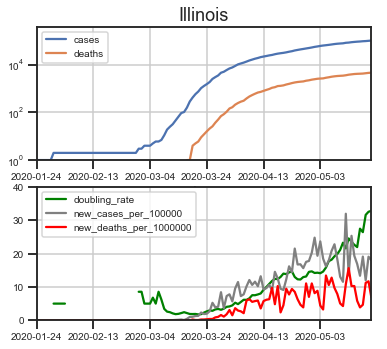

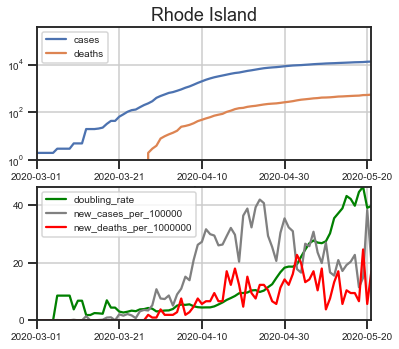

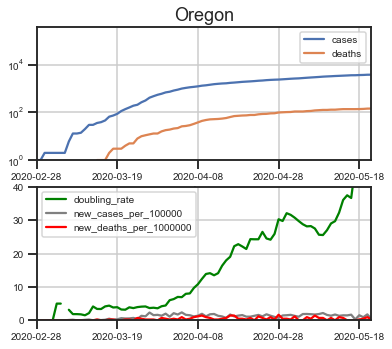

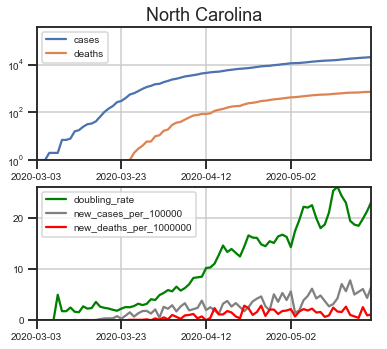

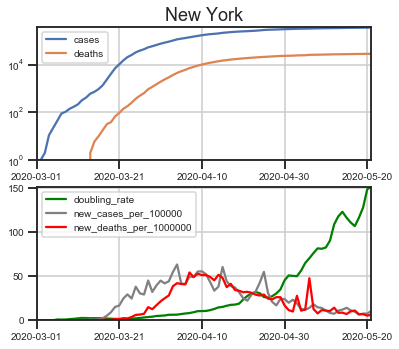

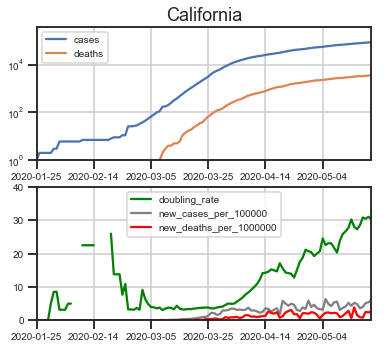

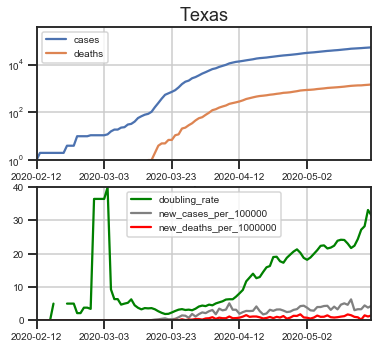

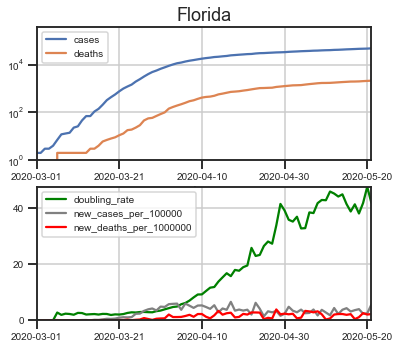

In [7]:

this_state=["Maryland","Virginia","District of Columbia","Michigan","Illinois","Rhode Island",\
            "Oregon", "North Carolina","New York","California","Texas","Florida"]

pop=[6045680, 8535519, 702455, 9986857, 12671821, 1059361, 4217737, 10488084, 19453561, 39512223, 28995881, 21477737]
#fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(16,10))
yr=[1,400000]
fs=10
days_passed=5

plt.rc('legend', fontsize=fs)    # legend fontsize
    

for i in range(0,len(this_state)):
    this=stt[stt.state==this_state[i]]
    tt=this.cases.to_numpy(copy=True)
    r_tt=np.roll(tt,days_passed)
    doubling_rate= (days_passed*np.log(2.))/(np.log(tt/r_tt))
    doubling_rate[np.argwhere(doubling_rate<0)]=0
    this['doubling_rate']=doubling_rate
    dr=100*this.deaths.to_numpy(copy=True) / this.cases.to_numpy(copy=True)
    this['death_rate']=dr
    
    cases=this.cases.to_numpy(copy=True)
    r_cases=np.roll(cases,1)
    this['new_cases']=cases-r_cases
    
    cases=this.cases.to_numpy(copy=True)
    r_cases=np.roll(cases,1)
    this['new_cases_per_100000']=100000*(cases-r_cases)/pop[i]

    deaths=this.deaths.to_numpy(copy=True)
    r_deaths=np.roll(deaths,1)
    this['new_deaths_per_1000000']=1000000*(deaths-r_deaths)/pop[i]
    
    deaths=this.deaths.to_numpy(copy=True)
    r_deaths=np.roll(deaths,1)
    this['new_deaths']=deaths-r_deaths
    
    yt=np.nanmax([this['doubling_rate'], this['new_cases_per_100000'], this['new_deaths_per_1000000']] )
    if (yt <= 0) : yt=40
    if (not(np.isfinite(yt))) : yt=40
    
    fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(6,6))
    this.plot('date',['cases','deaths'],kind = 'line',title=this_state[i],
              fontsize=fs,logy=True,ylim=yr,ax=axes[0],grid=True)
    this.plot('date',['doubling_rate','new_cases_per_100000','new_deaths_per_1000000'],kind = 'line',
          color=['green','grey','red'],fontsize=fs,logy=False,ylim=[0,yt],ax=axes[1],grid=True)
    this_savename="CV19_state_"+this_state[i].replace(" ", "")+".pdf"
    

    if (i == 0) : md=this
        
    plt.subplots_adjust(bottom=0.2)
    plt.xlabel("")
    plt.savefig(this_savename)
    plt.show()
    plt.close()
    
    

In [8]:
md


,date,state,fips,cases,deaths,doubling_rate,death_rate,new_cases,new_cases_per_100000,new_deaths_per_1000000,new_deaths
306,2020-03-05,Maryland,24,3,0,0.000000,0.000000,-43642,-721.870823,-357.114502,-2159
330,2020-03-06,Maryland,24,3,0,0.000000,0.000000,0,0.000000,0.000000,0
360,2020-03-07,Maryland,24,3,0,0.000000,0.000000,0,0.000000,0.000000,0
395,2020-03-08,Maryland,24,5,0,0.000000,0.000000,2,0.033081,0.000000,0
431,2020-03-09,Maryland,24,6,0,0.000000,0.000000,1,0.016541,0.000000,0
468,2020-03-10,Maryland,24,9,0,3.154649,0.000000,3,0.049622,0.000000,0
509,2020-03-11,Maryland,24,13,0,2.363533,0.000000,4,0.066163,0.000000,0
556,2020-03-12,Maryland,24,13,0,2.363533,0.000000,0,0.000000,0.000000,0
605,2020-03-13,Maryland,24,18,0,2.705632,0.000000,5,0.082704,0.000000,0
656,2020-03-14,Maryland,24,27,0,2.304227,0.000000,9,0.148867,0.000000,0


In [9]:
with open('CV19_md.pkl', 'wb') as fid:
     pickle.dump(md, fid)

/Users/kknobels/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


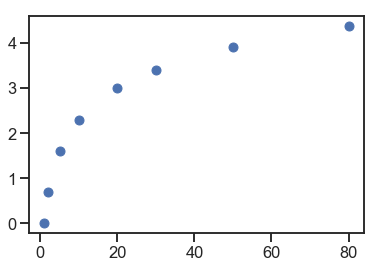

In [10]:
fmf=[0., 1., 2., 5., 10., 20., 30.,  50., 80.]

plt.plot(fmf,np.log(fmf),'o')

